### ***Feature Selection Techniques***
- ***Univariate Selection***    
    ***Score Functions:***
  - ***chi-square***
  - ***f_classif***
  - ***mutual_info_classif***
- ***Feature Importance***
- ***Correlation Matrix with Heat Map***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [4]:
df.shape

(270, 14)

In [6]:
X = df.drop(["Disease"],axis=1)
y = df["Disease"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### ***Univariate Selection***

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
feature = SelectKBest(score_func=f_classif)

In [9]:
feature.fit(X_train,y_train)

,score_func,<function f_c...00247CB88B060>
,k,10


In [14]:
score = pd.DataFrame(feature.scores_, columns=["Score Value"])
score

,Score Value
0,10.487959
1,15.432870
2,40.606089
3,6.258469
4,0.447475
5,0.001986
6,2.733188
7,44.831255
8,53.084359
9,57.470775


In [19]:
feature_name = pd.DataFrame(X.columns,columns=["Feature Name"])
feature_name

,Feature Name
0,age
1,sex
2,chest pain type
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,resting electrocardiographic results
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak


In [20]:
score = pd.concat([feature_name,score],axis=1)
score

,Feature Name,Score Value
0,age,10.487959
1,sex,15.432870
2,chest pain type,40.606089
3,resting blood pressure,6.258469
4,serum cholestoral in mg/dl,0.447475
5,fasting blood sugar > 120 mg/dl,0.001986
6,resting electrocardiographic results,2.733188
7,maximum heart rate achieved,44.831255
8,exercise induced angina,53.084359
9,oldpeak,57.470775


In [23]:
score.nlargest(8,"Score Value")

,Feature Name,Score Value
12,thal,70.912655
9,oldpeak,57.470775
8,exercise induced angina,53.084359
11,number of major vessels,49.322744
7,maximum heart rate achieved,44.831255
10,slope of peak,40.784834
2,chest pain type,40.606089
1,sex,15.432870


### ***Feature Importance***

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50, random_state=42)
clf.fit(X_train,y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [26]:
clf.feature_importances_

array([0.07036108, 0.03320619, 0.1030097 , 0.06767895, 0.06187777,
       0.01450758, 0.03336121, 0.0820437 , 0.09425669, 0.10033102,
       0.08499364, 0.10622067, 0.14815181])

In [30]:
clf_score = pd.Series(clf.feature_importances_, index=X.columns)
clf_score

age                                     0.070361
sex                                     0.033206
chest pain type                         0.103010
resting blood pressure                  0.067679
serum cholestoral in mg/dl              0.061878
fasting blood sugar > 120 mg/dl         0.014508
resting electrocardiographic results    0.033361
maximum heart rate achieved             0.082044
exercise induced angina                 0.094257
oldpeak                                 0.100331
slope of peak                           0.084994
number of major vessels                 0.106221
thal                                    0.148152
dtype: float64

<Axes: >

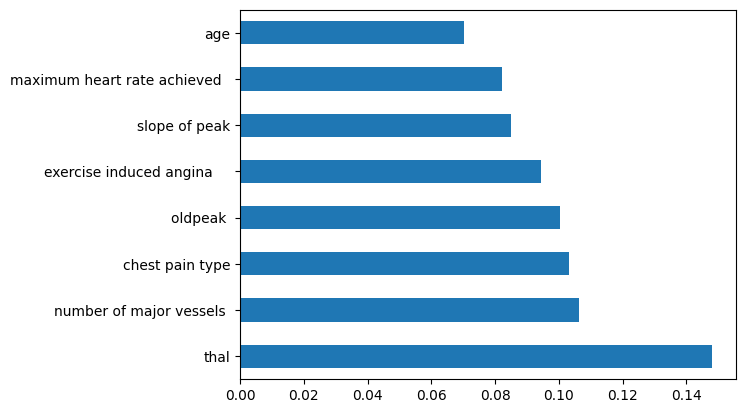

In [33]:
clf_score.nlargest(8).plot(kind="barh")

<Axes: >

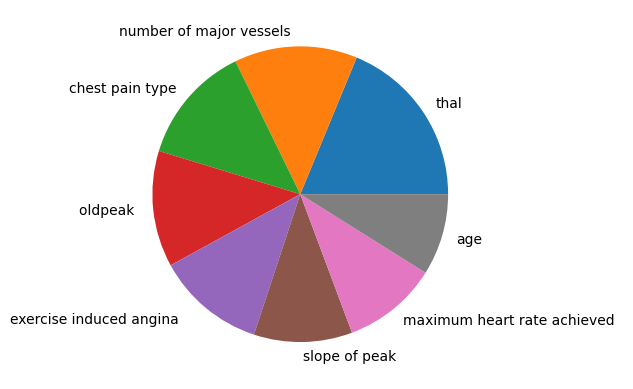

In [ ]:
clf_score.nlargest(8).plot(kind="pie",)

### ***Correlation Matrix with Heat Map***

<Axes: >

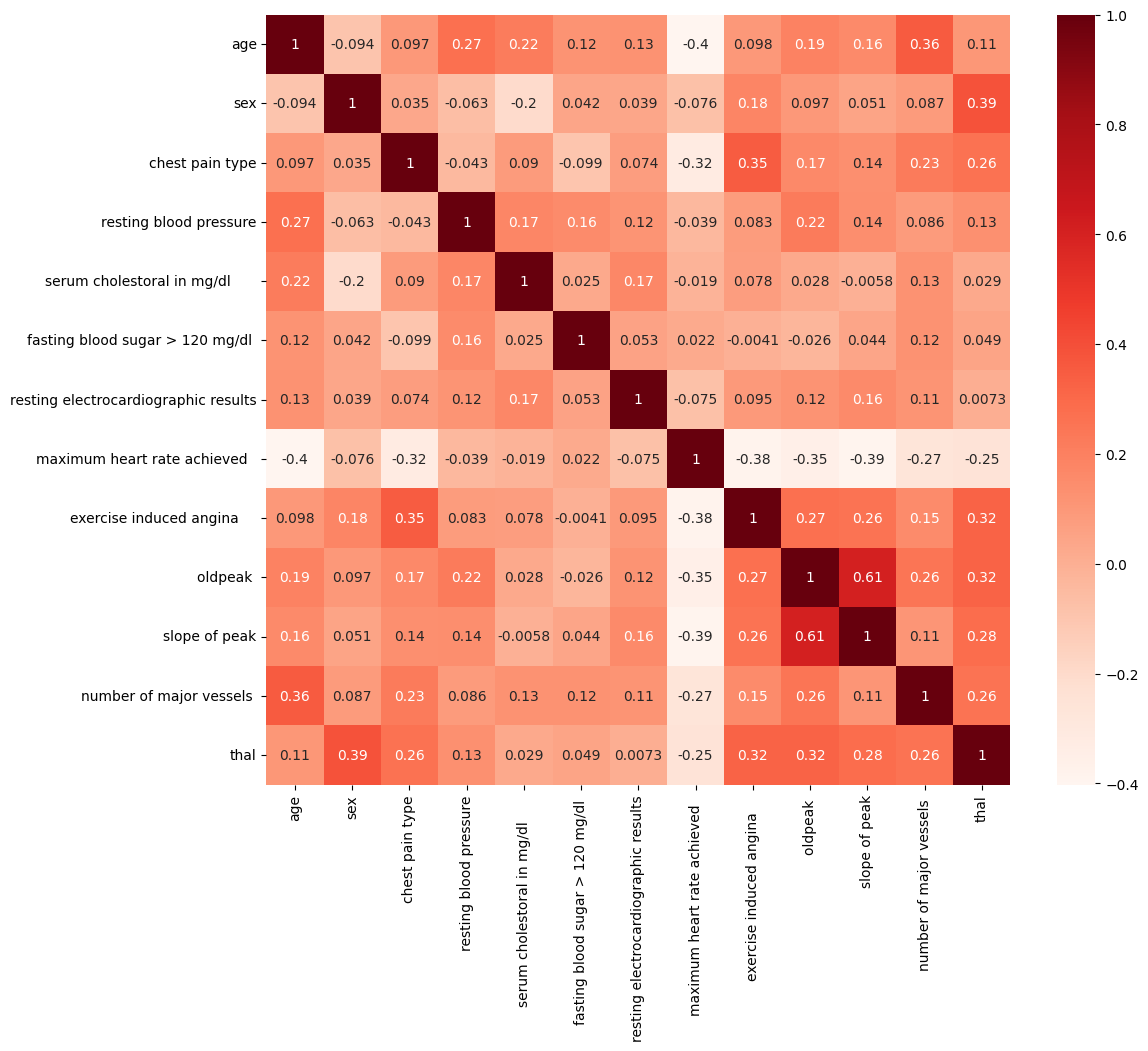

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), 
            annot=True, 
            cmap="Reds")